<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/PhD_Work_Creativity_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Goal is to create, Creative Function
#Goal is to design a new Architecture
#Validate the Results

In [3]:
#LSTM CODE Generation

#LSTM

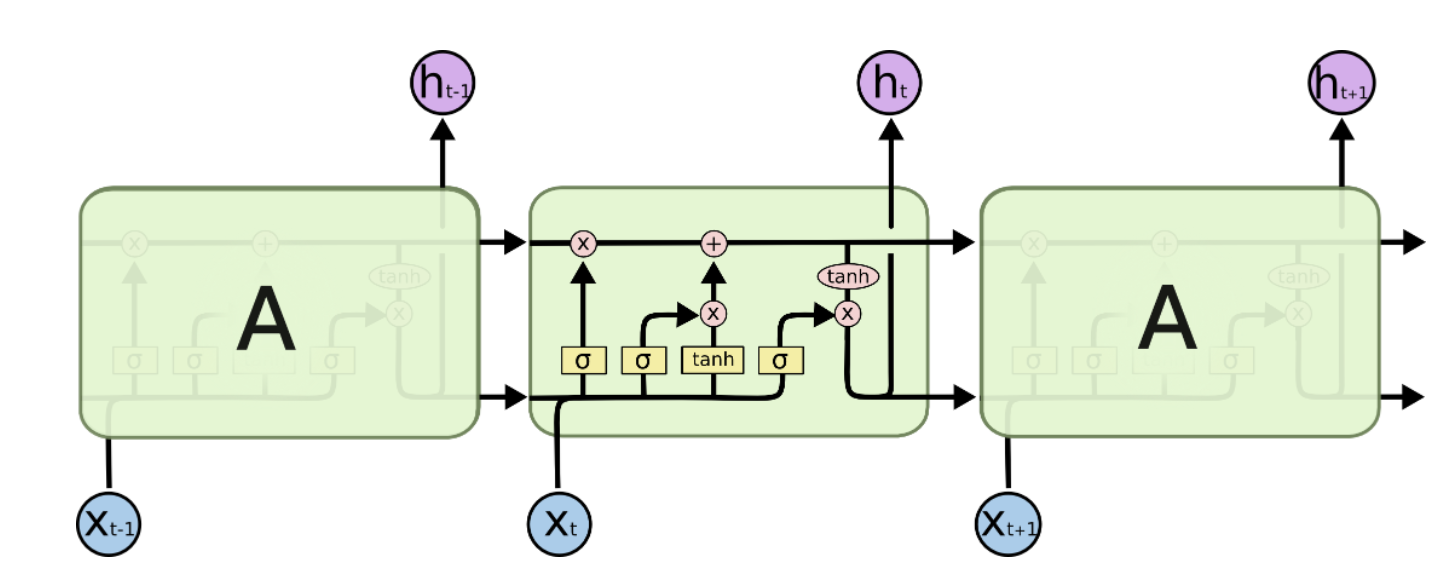

#Dataset

Articles April - 2017 





In [5]:
import pandas 

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

In [13]:
text_csv= pandas.read_csv("/content/sample_data/ArticlesApril2017.csv")

df=pandas.DataFrame(text_csv)

df.describe()

,articleWordCount,multimedia,printPage
count,886.000000,886.000000,886.000000
mean,1093.505643,3.857788,7.635440
std,799.095918,7.891072,10.809874
min,57.000000,0.000000,0.000000
25%,708.500000,3.000000,0.000000
50%,982.500000,3.000000,2.000000
75%,1291.750000,3.000000,13.000000
max,7832.000000,68.000000,74.000000


In [12]:
df[1:100]

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
1,NaN,58def3237c459f24986d7c84,823,By GAIL COLLINS,article,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",3,OpEd,23,2017-04-01 00:23:58,Unknown,Meet the gang from under the bus.,The New York Times,Op-Ed,https://www.nytimes.com/2017/03/31/opinion/and...
2,NaN,58def9f57c459f24986d7c90,575,By THE EDITORIAL BOARD,article,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",3,Editorial,22,2017-04-01 00:53:06,Unknown,A court ruling annulling the legislature’s aut...,The New York Times,Editorial,https://www.nytimes.com/2017/03/31/opinion/ven...
3,NaN,58defd317c459f24986d7c95,1374,By MICHAEL POWELL,article,Stain Permeates Basketball Blue Blood,"['Basketball (College)', 'University of North ...",3,Sports,1,2017-04-01 01:06:52,College Basketball,"For two decades, until 2013, North Carolina en...",The New York Times,News,https://www.nytimes.com/2017/03/31/sports/ncaa...
4,NaN,58df09b77c459f24986d7ca7,708,By DEB AMLEN,article,Taking Things for Granted,['Crossword Puzzles'],3,Games,0,2017-04-01 02:00:14,Unknown,In which Howard Barkin and Will Shortz teach u...,The New York Times,News,https://www.nytimes.com/2017/03/31/crosswords/...
5,NaN,58df09b77c459f24986d7ca8,1065,By BEN BRANTLEY,article,The Caged Beast Awakens,"['Theater', 'Park Avenue Armory (Manhattan, NY...",3,Culture,1,2017-04-01 02:00:17,Unknown,"In this visually ravishing production, Bobby C...",The New York Times,Review,https://www.nytimes.com/2017/03/31/theater/hai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,58e43fde7c459f24986d866d,724,By THE EDITORIAL BOARD,article,The Supreme Court as Partisan Tool,"['United States Politics and Government', 'Fil...",3,Editorial,22,2017-04-05 00:52:38,Unknown,The judicial confirmation process is mirroring...,The New York Times,Editorial,https://www.nytimes.com/2017/04/04/opinion/the...
96,NaN,58e444817c459f24986d8677,877,By ERICA L. GREEN,article,2 Picks for Education Dept. Raise Fears on Civ...,"['Trump, Donald J', 'United States Politics an...",3,National,11,2017-04-05 01:12:24,Politics,"The two selections for high-profile posts, bot...",The New York Times,News,https://www.nytimes.com/2017/04/04/us/politics...
97,NaN,58e447087c459f24986d867e,1189,By PETER BAKER,article,"For Trump, a Focus on U.S. Interests and a Dis...","['Trump, Donald J', 'United States Internation...",3,Foreign,1,2017-04-05 01:23:10,Politics,Where other American presidents might have use...,The New York Times,News Analysis,https://www.nytimes.com/2017/04/04/us/politics...
98,NaN,58e44fab7c459f24986d8691,725,By DEB AMLEN,article,At the Center of the Universe,['Crossword Puzzles'],3,Games,0,2017-04-05 02:00:04,Unknown,Alex Eaton-Salners returns with a controversia...,The New York Times,News,https://www.nytimes.com/2017/04/04/crosswords/...


In [4]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential


# set seeds for reproducability
import tensorflow 
import pandas as pd
import numpy as np
import string 
import os 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
from keras.utils import np_utils

In [6]:
import keras.utils as ku 

In [ ]:
from tensorflow.keras.utils import to_categorical

In [8]:
from numpy import random

In [9]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [16]:
curr_dir = '/content/sample_data/'
all_headlines = []
for filename in os.listdir(curr_dir):
    if 'Articles' in filename:
        article_df = pd.read_csv(curr_dir + filename)
        all_headlines.extend(list(article_df.headline.values))
        break

all_headlines = [h for h in all_headlines if h != "Unknown"]
len(all_headlines)

831

In [17]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt 

corpus = [clean_text(x) for x in all_headlines]
corpus[:10]

['finding an expansive view  of a forgotten people in niger',
 'and now  the dreaded trump curse',
 'venezuelas descent into dictatorship',
 'stain permeates basketball blue blood',
 'taking things for granted',
 'the caged beast awakens',
 'an everunfolding story',
 'oreilly thrives as settlements add up',
 'mouse infestation',
 'divide in gop now threatens trump tax plan']

In [18]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

[[169, 17],
 [169, 17, 665],
 [169, 17, 665, 367],
 [169, 17, 665, 367, 4],
 [169, 17, 665, 367, 4, 2],
 [169, 17, 665, 367, 4, 2, 666],
 [169, 17, 665, 367, 4, 2, 666, 170],
 [169, 17, 665, 367, 4, 2, 666, 170, 5],
 [169, 17, 665, 367, 4, 2, 666, 170, 5, 667],
 [6, 80]]

In [19]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [20]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 10)            24220     
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 2422)              244622    
                                                                 
Total params: 313,242
Trainable params: 313,242
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(predictors, label, epochs=100, verbose=5)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [ ]:
#Generating Text

In [54]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        np.argmax(predicted)
        
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            #print(type(index))
            #print(type(predicted))
            if index == predicted.all():
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [55]:
print (generate_text("united states", 5, model, max_sequence_len))
print (generate_text("preident trump", 4, model, max_sequence_len))
print (generate_text("donald trump", 4, model, max_sequence_len))
print (generate_text("india and china", 4, model, max_sequence_len))
print (generate_text("new york", 4, model, max_sequence_len))
print (generate_text("science and technology", 5, model, max_sequence_len))

United States The The The The The
Preident Trump The The The The
Donald Trump The The The The
India And China The The The The
New York The The The The
Science And Technology The The The The The
